# Southern Ocean Warming

In [1]:
%load_ext autoreload
%autoreload 2

import os
import x4c
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
print(x4c.__version__)
os.chdir('/glade/work/fengzhu/Projects/paper-MCO_iCESM/notebooks')
!hostname

2025.6.14
crhtc76


In [2]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'
case = x4c.Timeseries(dirpath, grid_dict={'atm': 'ne16np4'})

>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne16np4', 'ocn': 'g16', 'lnd': 'ne16np4', 'rof': 'ne16np4', 'ice': 'g16'}
>>> case.vars_info created


In [3]:
case.calc('MLD:3')
case.calc('MLD:9')

MLD_3 = case.diags['MLD:3'].mean('time')
MLD_9 = case.diags['MLD:9'].mean('time')

mask = MLD_3.lat > 0
case.diags['MLD:mix'] = MLD_3.where(mask, other=MLD_9)

da_mld = case.diags['MLD:mix'].x.regrid()

>>> MLD is a supported derived variable.
>>> case.ds["XMXL"] created
>>> Timespan: [8951-01-31 00:00:00, 9000-12-31 00:00:00]
>>> case.diags["MLD:3"] created
>>> MLD is a supported derived variable.
>>> Timespan: [8951-01-31 00:00:00, 9000-12-31 00:00:00]
>>> case.diags["MLD:9"] created


In [4]:
case.calc('SST_eq ~ SST|regrid:ann')
case.calc('SST_ic ~ SST|regrid:ann', timespan=(501, 550))
case.diags['SST_diff'] = case.diags['SST_eq'].mean('time') - case.diags['SST_ic'].mean('time')

>>> case.ds["SST"] created
>>> Timespan: [8951-01-31 00:00:00, 9000-12-31 00:00:00]
>>> case.diags["SST_eq"] created
>>> case.ds["SST"] will be reloaded due to different paths.
>>> case.ds["SST"] created
>>> Timespan: [0501-01-31 00:00:00, 0550-12-31 00:00:00]
>>> case.diags["SST_ic"] created


In [5]:
case.calc('TEMP_eq ~ TEMP:ann:yz')
case.calc('TEMP_ic ~ TEMP:ann:yz', timespan=(501, 550))
case.diags['TEMP_diff'] = case.diags['TEMP_eq'].mean('time') - case.diags['TEMP_ic'].mean('time')

>>> case.ds["TEMP"] created
>>> Timespan: [8951-01-31 00:00:00, 9000-12-31 00:00:00]
>>> case.diags["TEMP_eq"] created
>>> case.ds["TEMP"] will be reloaded due to different paths.
>>> case.ds["TEMP"] created
>>> Timespan: [0501-01-31 00:00:00, 0550-12-31 00:00:00]
>>> case.diags["TEMP_ic"] created


In [6]:
case.calc('MOC:ann')

>>> case.ds["MOC"] created
>>> Timespan: [8951-01-31 00:00:00, 9000-12-31 00:00:00]
>>> case.diags["MOC:ann"] created


<xarray.DataArray 'MOC' (time: 50, z_t: 61, lat: 91)> Size: 1MB
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.94341654e-03, -3.89124529e-04,  1.73436900e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.72229052e-01,  9.17188302e-02,  5.70570379e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.36894444e-01,  1.23025537e-01,  7.05491826e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          8.16434749e-07,  8.16434749e-07,  8.16434749e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.74996466e-07,  2.74996466e-07,  2.74996466e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.55033849e-04, -2.44729948e-04, -7.91880884e-05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.11171342e-01,  6.28634840e-02,  4.01812606e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.63042381e-01,  1.01493865e-01,  6.58850148e-02],
...
          7.12094504e-07,  7.12094504e-07,  7.12094504e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -5.03204035e-07, -5.03204035e-07, -5.03204035e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.90572022e-03,  4.49017592e-04, -7.26856306e-05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          4.07577157e-02,  5.96384890e-02,  6.74766377e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.71115452e-02,  7.92309120e-02,  9.72099304e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.04821856e-06, -1.04821856e-06, -1.04821856e-06],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -9.27436304e-07, -9.27436304e-07, -9.27436304e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      shape=(50, 61, 91), dtype=float32)
Coordinates:
    moc_components  |S256 256B b'Eulerian Mean'
  * lat             (lat) float32 364B -90.0 -88.0 -86.0 ... 86.0 88.0 90.0
  * z_t             (z_t) float32 244B 0.0 0.01 0.02 0.03 ... 4.75 5.0 5.25 5.5
  * time            (time) object 400B 8951-12-31 00:00:00 ... 9000-12-31 00:...
Attributes:
    long_name:     Meridional Overturning Circulation (Annual)
    units:         Sverdrups
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'TAREA' (nlat: 384, nlon: 320)> Size: 98...
    lat:           <xarray.DataArray 'TLAT' (nlat: 384, nlon: 320)> Size: 983...
    lon:           <xarray.DataArray 'TLONG' (nlat: 384, nlon: 320)> Size: 98...
    dz:            <xarray.DataArray 'dz' (z_t: 60)> Size: 240B\n[60 values w...
    comp:          ocn
    grid:          g16
    lon_name:      Meridional Ocean Circulation

In [7]:
case.calc('PD_eq ~ PD:ann:yz')
case.diags['sigma'] = (case.diags['PD_eq'] - 1)*1000

>>> case.ds["PD"] created
>>> Timespan: [8951-01-31 00:00:00, 9000-12-31 00:00:00]
>>> case.diags["PD_eq"] created


In [8]:
case.calc('AICE_eq ~ aice|regrid:8,9,10')

>>> case.ds["aice"] created
>>> Timespan: [8951-01-31 00:00:00, 9000-12-31 00:00:00]
>>> case.diags["AICE_eq"] created


<xarray.DataArray 'AICE_eq' (time: 50, lat: 180, lon: 360)> Size: 13MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]],
      shape=(50, 180, 360), dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) object 400B 8951-10-31 00:00:00 ... 9000-10-31 00:00:00
Attributes:
    units:          %
    long_name:      ice area  (aggregate) (ASO)
    cell_measures:  area: tarea
    comment:        none
    cell_methods:   time: mean
    time_rep:       averaged
    path:           /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeser...
    gw:             <xarray.DataArray 'tarea' (nj: 384, ni: 320)> Size: 492kB...
    comp:           ice
    grid:           g16

In [9]:
%%time

case.diags['SST_eq'].load()
case.diags['SST_diff'].load()
case.diags['TEMP_eq'].load()
case.diags['TEMP_diff'].load()
case.diags['PD_eq'].load()

CPU times: user 209 μs, sys: 0 ns, total: 209 μs
Wall time: 216 μs


<xarray.DataArray 'PD_eq' (time: 50, z_t: 60, lat: 180)> Size: 2MB
array([[[      nan,       nan,       nan, ..., 1.0177033, 1.017691 ,
         1.0176892],
        [      nan,       nan,       nan, ..., 1.0177673, 1.0177573,
         1.0177596],
        [      nan,       nan,       nan, ..., 1.017961 , 1.0179372,
         1.0179292],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 1.017786 , 1.0177943,
         1.017801 ],
        [      nan,       nan,       nan, ..., 1.0178388, 1.0178447,
         1.0178523],
        [      nan,       nan,       nan, ..., 1.0180331, 1.0180293,
         1.0180316],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 1.0181953, 1.0181874,
         1.0181826],
        [      nan,       nan,       nan, ..., 1.0182402, 1.0182267,
         1.0182226],
        [      nan,       nan,       nan, ..., 1.0184171, 1.0183858,
         1.01837  ],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], shape=(50, 60, 180), dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * z_t      (z_t) float32 240B 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * time     (time) object 400B 8951-12-31 00:00:00 ... 9000-12-31 00:00:00
Attributes:
    long_name:     Zonal Mean Potential Density Ref to Surface (Annual)
    units:         gram/centimeter^3
    grid_loc:      3111
    cell_methods:  time: mean
    path:          /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'TAREA' (nlat: 384, nlon: 320)> Size: 98...
    lat:           <xarray.DataArray 'TLAT' (nlat: 384, nlon: 320)> Size: 983...
    lon:           <xarray.DataArray 'TLONG' (nlat: 384, nlon: 320)> Size: 98...
    dz:            <xarray.DataArray 'dz' (z_t: 60)> Size: 240B\n[60 values w...
    comp:          ocn
    grid:          g16

## Visualization

>>> case.ds["SSH"] created
>>> "sigma:ann" not calculated yet. Calculating now ...
>>> Variable `sigma` is already calculated and the calculation is skipped.
>>> Timespan: [8951-12-31 00:00:00, 9000-12-31 00:00:00]
>>> case.diags["sigma:ann"] created


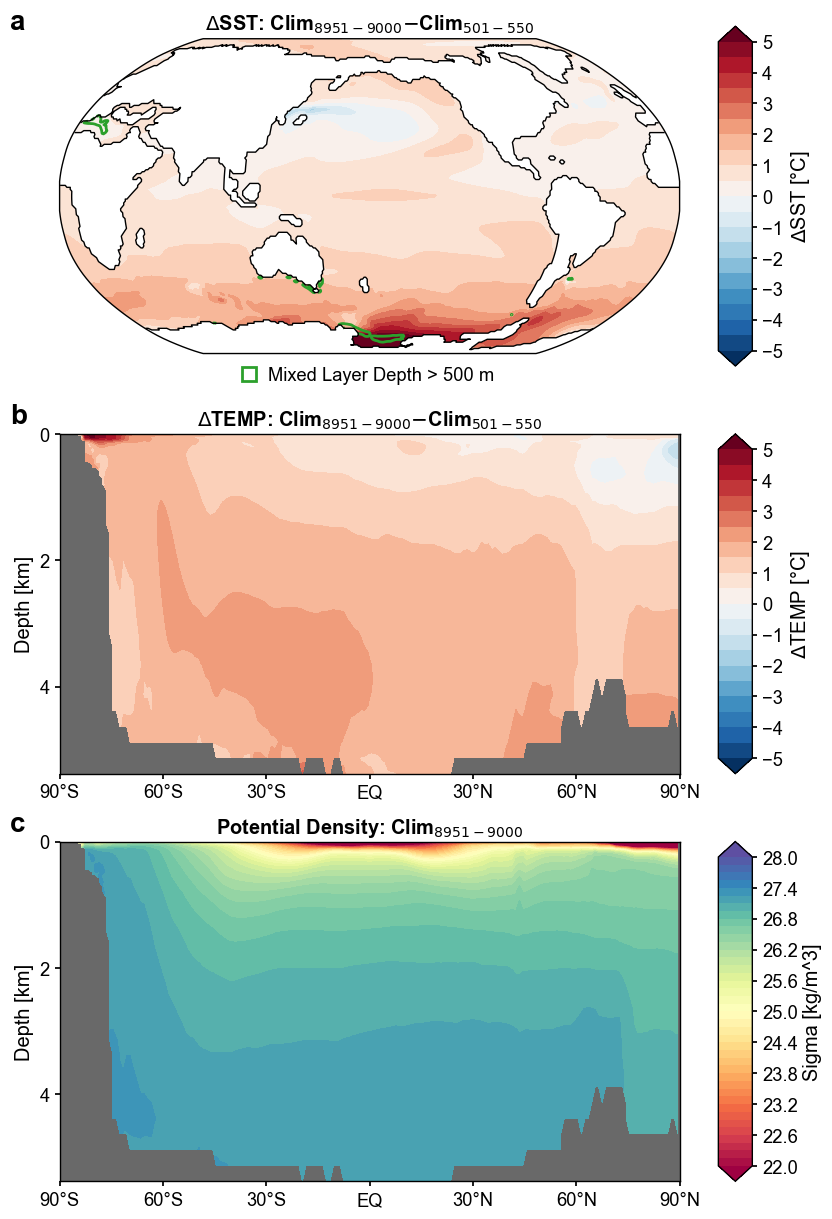

Figure saved at: "../figs/Fig.05.pdf"


In [10]:
from matplotlib.lines import Line2D

x4c.set_style('journal_spines', font_scale=1.2)
fig, ax = x4c.visual.subplots(
    figsize=(10, 15),
    nrow=3, ncol=1,
    hspace=0.2, wspace=0.1,
    ax_loc={
        'map_sst_diff': (0, 0),
        'yz_temp_diff': (1, 0),
        'rho': (2, 0),
    },
    projs={
        'map_sst_diff': 'Robinson',
    },
    projs_kws={
        'map_sst_diff': {'central_longitude': 180},
    },
    annotation=True,
    annotation_kws={'loc_x': -0.08, 'style': ''},
)

case.plot(
    'SST_diff',
    levels=np.linspace(-5, 5, 21),
    cbar_kwargs={'ticks': np.linspace(-5, 5, 11), 'label': r'$\Delta$SST [°C]'},
    ax=ax['map_sst_diff'],
)
ax['map_sst_diff'].contour(da_mld.lon, da_mld.lat, da_mld, levels=[500,], transform=ccrs.PlateCarree(), colors='tab:green')
ax['map_sst_diff'].set_title(r'$\Delta$SST: Clim$_{8951-9000}$$-$Clim$_{501-550}$', fontweight='bold')
ax['map_sst_diff'].set_xlabel(r'$\Delta$SST: Clim$_{8951-9000}$$-$Clim$_{501-550}$', fontweight='bold')
square_legend = Line2D([0], [0], markeredgecolor='tab:green', marker='s', linestyle='', markersize=10, markeredgewidth=2, markerfacecolor='none', label='Mixed Layer Depth > 500 m')
ax['map_sst_diff'].legend(
    handles=[square_legend], loc='lower left', bbox_to_anchor=(0.25, -0.15),
    handletextpad=0,
)

case.plot(
    'TEMP_diff',
    levels=np.linspace(-5, 5, 21),
    cbar_kwargs={
        'ticks': np.linspace(-5, 5, 11),
        'label': r'$\Delta$TEMP [°C]',
    },
    ax=ax['yz_temp_diff'],
)
ax['yz_temp_diff'].grid(False)
ax['yz_temp_diff'].set_title(r'$\Delta$TEMP: Clim$_{8951-9000}$$-$Clim$_{501-550}$', fontweight='bold')
# ax['yz_temp_diff'].xaxis.set_visible(False)
ax['yz_temp_diff'].set_xlabel(None)

case.plot(
    'sigma:ann',
    levels=np.linspace(22, 28, 41),
    cbar_kwargs={
        'ticks': np.linspace(22, 28, 11),
        'label': r'Sigma [kg/m^3]',
    },
    cmap='Spectral',
    ax=ax['rho'],
)
ax['rho'].grid(False)
ax['rho'].set_title(r'Potential Density: Clim$_{8951-9000}$', fontweight='bold')
ax['rho'].set_xlabel(None)

x4c.showfig(fig)
x4c.savefig(fig, '../figs/Fig.05.pdf')